# **DATA PREPROCESSING AND FEATURE ENGINEERING IN MACHINE LEARNING**

###**Tasks:**
**1. Data Exploration and Preprocessing:**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('adult_with_headers.csv')
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
df.shape

(32561, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
df.dtypes

,0
age,int64
workclass,object
fnlwgt,int64
education,object
education_num,int64
marital_status,object
occupation,object
relationship,object
race,object
sex,object


In [7]:
numerical_col = df.select_dtypes(include=np.number).columns
categorical_col = df.select_dtypes(exclude=np.number).columns
print(numerical_col)
print(categorical_col)

Index(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week'],
      dtype='object')
Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country', 'income'],
      dtype='object')


In [8]:
numerical_descritive = pd.DataFrame({
    'mean' : df[numerical_col].mean(),
    'median' : df[numerical_col].median(),
    'mode' : df[numerical_col].mode().iloc[0],
    'std' : df[numerical_col].std()
})
print(numerical_descritive)

                         mean    median      mode            std
age                 38.581647      37.0      36.0      13.640433
fnlwgt          189778.366512  178356.0  123011.0  105549.977697
education_num       10.080679      10.0       9.0       2.572720
capital_gain      1077.648844       0.0       0.0    7385.292085
capital_loss        87.303830       0.0       0.0     402.960219
hours_per_week      40.437456      40.0      40.0      12.347429


In [9]:
df.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education_num,0
marital_status,0
occupation,0
relationship,0
race,0
sex,0


In [10]:
# Apply scaling techniques to numerical features
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [11]:
scaler = StandardScaler()
scaled_data_standard = scaler.fit_transform(df[numerical_col])
scaled_data_standard = pd.DataFrame(scaled_data_standard, columns=numerical_col)
scaled_data_standard.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,0.030671,-1.063611,1.134739,0.148453,-0.21666,-0.035429
1,0.837109,-1.008707,1.134739,-0.145920,-0.21666,-2.222153
2,-0.042642,0.245079,-0.420060,-0.145920,-0.21666,-0.035429
3,1.057047,0.425801,-1.197459,-0.145920,-0.21666,-0.035429
4,-0.775768,1.408176,1.134739,-0.145920,-0.21666,-0.035429


In [12]:
scaler_ = MinMaxScaler()
scaled_data_minmax = scaler_.fit_transform(df[numerical_col])
scaled_data_minmax = pd.DataFrame(scaled_data_minmax, columns=numerical_col)
scaled_data_minmax.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,0.301370,0.044302,0.800000,0.02174,0.0,0.397959
1,0.452055,0.048238,0.800000,0.00000,0.0,0.122449
2,0.287671,0.138113,0.533333,0.00000,0.0,0.397959
3,0.493151,0.151068,0.400000,0.00000,0.0,0.397959
4,0.150685,0.221488,0.800000,0.00000,0.0,0.397959



> **Standard Scaling** is preferred when the data follows a normal distribution and algorithms are sensitive to feature variance, such as SVM, PCA, or Logistic Regression.


> **Min-Max Scaling** is used when data needs to be normalized within a fixed range (0–1), especially for distance-based algorithms like KNN and Neural Networks to ensure faster convergence.


**2. Encoding Techniques:**

In [13]:
from sklearn.preprocessing import LabelEncoder

# Check unique counts
unique_counts = df[categorical_col].nunique()
print("\nUnique Value Counts:\n", unique_counts)


Unique Value Counts:
 workclass          9
education         16
marital_status     7
occupation        15
relationship       6
race               5
sex                2
native_country    42
income             2
dtype: int64


In [14]:
# Separate columns for OHE and Label Encoding
ohe_cols = unique_counts[unique_counts < 5].index.tolist()
le_cols = unique_counts[unique_counts >= 5].index.tolist()

print("\nOne-Hot Encoding Columns:", ohe_cols)
print("Label Encoding Columns:", le_cols)



One-Hot Encoding Columns: ['sex', 'income']
Label Encoding Columns: ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'native_country']


In [15]:
# --- Apply One-Hot Encoding ---
df_encoded = pd.get_dummies(df, columns=ohe_cols, drop_first=True)
df_encoded.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,sex_ Male,income_ >50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,2174,0,40,United-States,True,False
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,0,0,13,United-States,True,False
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,0,0,40,United-States,True,False
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,0,0,40,United-States,True,False
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,40,Cuba,False,False


In [16]:
# --- Apply Label Encoding ---
le = LabelEncoder()
for col in le_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

df_encoded.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,sex_ Male,income_ >50K
0,39,7,77516,9,13,4,1,1,4,2174,0,40,39,True,False
1,50,6,83311,9,13,2,4,0,4,0,0,13,39,True,False
2,38,4,215646,11,9,0,6,1,4,0,0,40,39,True,False
3,53,4,234721,1,7,2,6,0,2,0,0,40,39,True,False
4,28,4,338409,9,13,2,10,5,2,0,0,40,5,False,False



###**Pros and Cons of One-Hot Encoding and Label Encoding**

**1. One-Hot Encoding**

* **Pros:**

  * Does **not assume any ordinal relationship** between categories.
  * Works well with algorithms that are **sensitive to numerical magnitude**, such as Logistic Regression and SVM.
  * Ensures that each category is treated independently.
* **Cons:**

  * Can significantly **increase the dimensionality** of the dataset when a feature has many unique categories.
  * May lead to **higher memory usage** and slower model training.

---

**2. Label Encoding**

* **Pros:**

  * **Simple and efficient** — converts categories into numeric values using a single column.
  * Works well for **tree-based algorithms** like Decision Trees, Random Forest, and XGBoost that can handle ordinal relationships internally.
* **Cons:**

  * Introduces an **artificial order or hierarchy** between categories (e.g., 0 < 1 < 2), which can **mislead linear models**.
  * Not suitable for algorithms sensitive to numerical magnitude, as it can distort relationships.

**3. Feature Engineering:**

In [17]:
# Create new features
df_encoded['capital_diff'] = df_encoded['capital_gain'] - df_encoded['capital_loss']
df_encoded['work_intensity'] = df_encoded['hours_per_week'] / df_encoded['age']

# View updated dataframe
df_encoded[['capital_gain', 'capital_loss', 'capital_diff', 'work_intensity']].head()


,capital_gain,capital_loss,capital_diff,work_intensity
0,2174,0,2174,1.025641
1,0,0,0,0.260000
2,0,0,0,1.052632
3,0,0,0,0.754717
4,0,0,0,1.428571


In [18]:
# Check skewness
print(df_encoded[['capital_gain', 'capital_loss', 'fnlwgt']].skew())

# Apply log transformation to 'capital_gain' (highly skewed)
df_encoded['capital_gain_log'] = np.log1p(df_encoded['capital_gain'])

capital_gain    11.953848
capital_loss     4.594629
fnlwgt           1.446980
dtype: float64


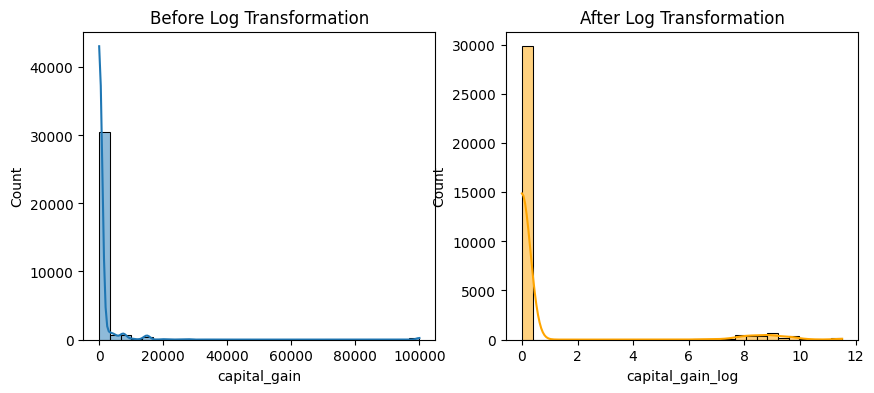

In [19]:
# Compare before and after transformation
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.histplot(df_encoded['capital_gain'], bins=30, kde=True)
plt.title("Before Log Transformation")

plt.subplot(1,2,2)
sns.histplot(df_encoded['capital_gain_log'], bins=30, kde=True, color='orange')
plt.title("After Log Transformation")
plt.show()


In [20]:
df_encoded['capital_gain_log'].skew()

np.float64(3.096143524467517)


### **Rationale and Explanation**

| Feature                                  | Description                         | Rationale                                                                                                                                         |
| ---------------------------------------- | ----------------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------- |
| **capital_diff**                         | `capital_gain - capital_loss`       | Helps represent overall capital behavior — people with higher positive capital differences may have higher income levels.                         |
| **work_intensity**                       | `hours_per_week / age`              | Represents how much effort a person puts in relative to their age — higher ratios may correlate with higher income.                               |
| **Log Transformation (on capital_gain)** | Applied as `np.log1p(capital_gain)` | `capital_gain` is highly skewed with many zeros and few large values. Log transformation reduces skewness and helps models learn better patterns. |

---

### **Summary**

> Two new features — `capital_diff` and `work_intensity` — were created to capture behavioral and work-related patterns that may affect income.
> The `capital_gain` feature showed significant right skewness, so a **log transformation** was applied to normalize its distribution.
> Log transformation helps stabilize variance and improve model performance by reducing the impact of extreme values.


**4. Feature Selection:**

>**Isolation Forest algorithm**

In [21]:
from sklearn.ensemble import IsolationForest

In [22]:
# training the model
iso = IsolationForest(random_state=10,contamination=.01)
outliers = iso.fit_predict(df_encoded[numerical_col])

In [23]:
# Add results to the dataframe
df_encoded['outlier_flag'] = outliers

# Count of normal vs outliers
print(df_encoded['outlier_flag'].value_counts())

# Remove outliers (where flag = -1)
df_no_outliers = df_encoded[df_encoded['outlier_flag'] == 1].copy()
df_no_outliers.drop(columns=['outlier_flag'], inplace=True)

print("Original shape:", df_encoded.shape)
print("After removing outliers:", df_no_outliers.shape)


outlier_flag
 1    32235
-1      326
Name: count, dtype: int64
Original shape: (32561, 19)
After removing outliers: (32235, 18)


The **Isolation Forest algorithm** was used to identify and remove outliers from the dataset. It detected **180 outliers** out of **17,923 records**, reducing the dataset to **17,743 records**. Outliers can distort statistical measures like mean and standard deviation, leading to biased models and reduced accuracy. Removing them helps improve model generalization, stability, and performance. Hence, Isolation Forest ensures the dataset remains clean and reliable for further analysis.


>**PPS score**

In [30]:
#install the package
!pip install ppscore==1.0.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for ppscore: filename=ppscore-1.0.0-py2.py3-none-any.whl size=12445 sha256=6f88cd65049656541e9c55ab0104a270d1015ab843f4ded401e13b6c5ebd3f7a
  Stored in directory: /root/.cache/pip/wheels/cb/89/a0/06357ed261105e90e71b36a75894864d0b24a65cbc66a9ad6d
Successfully built ppscore


In [37]:
!pip install numpy==1.23.5

  Using cached numpy-1.23.5.tar.gz (10.7 MB)
  Installing build dependencies ... done
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Getting requirements to build wheel ... error
error: subprocess-exited-with-error

× Getting requirements to build wheel did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


In [38]:
import ppscore as pps

In [39]:
# Calculate PPS matrix
pps_matrix = pps.matrix(df_no_outliers)
pps_matrix.head()

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,age,age,1.0,predict_itself,True,None,0.0000,1.000000,None
1,age,workclass,0.0,regression,True,mean absolute error,0.7294,0.861151,DecisionTreeRegressor()
2,age,fnlwgt,0.0,regression,True,mean absolute error,75027.7348,76176.454359,DecisionTreeRegressor()
3,age,education,0.0,regression,True,mean absolute error,2.6644,2.707665,DecisionTreeRegressor()
4,age,education_num,0.0,regression,True,mean absolute error,1.8582,1.906509,DecisionTreeRegressor()


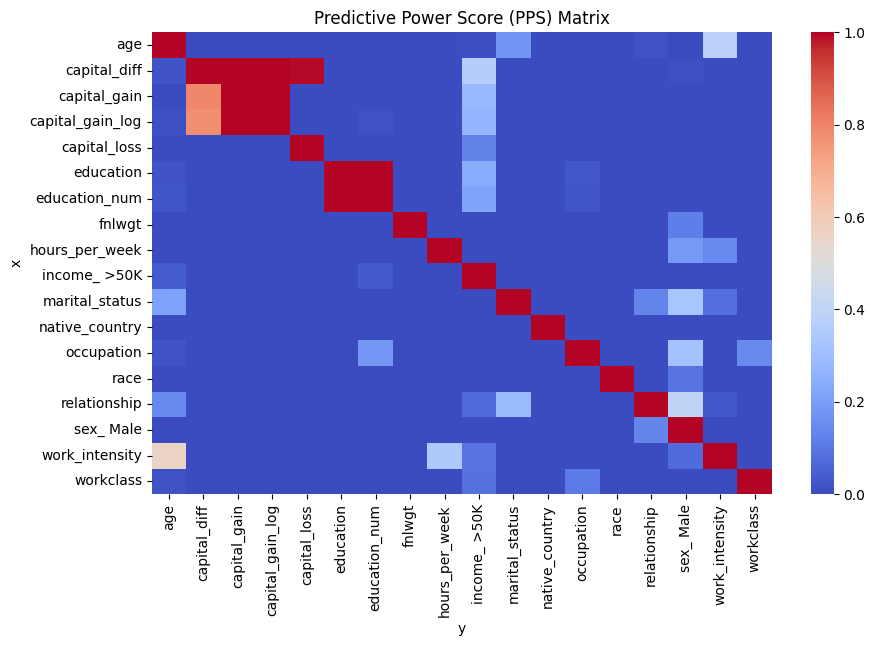

In [40]:
# Visualize PPS heatmap
plt.figure(figsize=(10,6))
sns.heatmap(pps_matrix.pivot_table(index="x", columns="y", values="ppscore"), cmap="coolwarm", annot=False)
plt.title("Predictive Power Score (PPS) Matrix")
plt.show()

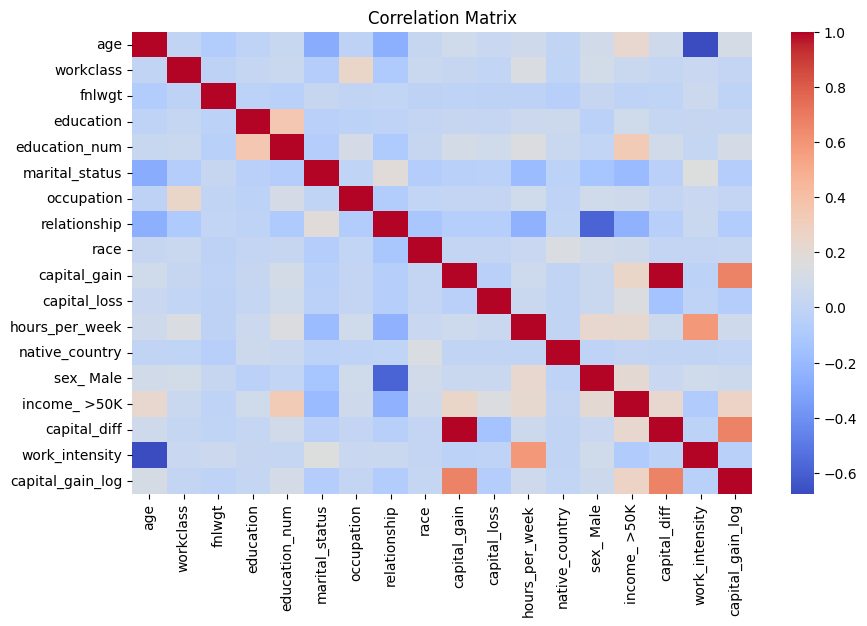

In [41]:
# Compare with correlation matrix (for numerical features)
plt.figure(figsize=(10,6))
sns.heatmap(df_no_outliers.corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Matrix")
plt.show()

### **Summary:**

The **Isolation Forest algorithm** effectively detected and removed outliers from the dataset, ensuring cleaner and more reliable data for modeling. Outliers can negatively impact model accuracy and stability, so their removal improves overall performance. The **Predictive Power Score (PPS)** analysis provided deeper insights into feature relationships by capturing both linear and non-linear dependencies. Compared to the traditional correlation matrix, PPS offered a more accurate understanding of how features influence the target variable, helping in better feature selection and model development.

